# LeNet-5 CNN Architecture : 

*   (1,32,32) Input
*   (5,5), s=1, p=0 
*   Avg pool, s=2, p=0
*   (5,5), s=1, p=0
*   Avg pool, s=2, p=0
*   Conv (5,5) to 120 channels * Linear 120
*   84 * Linear 10

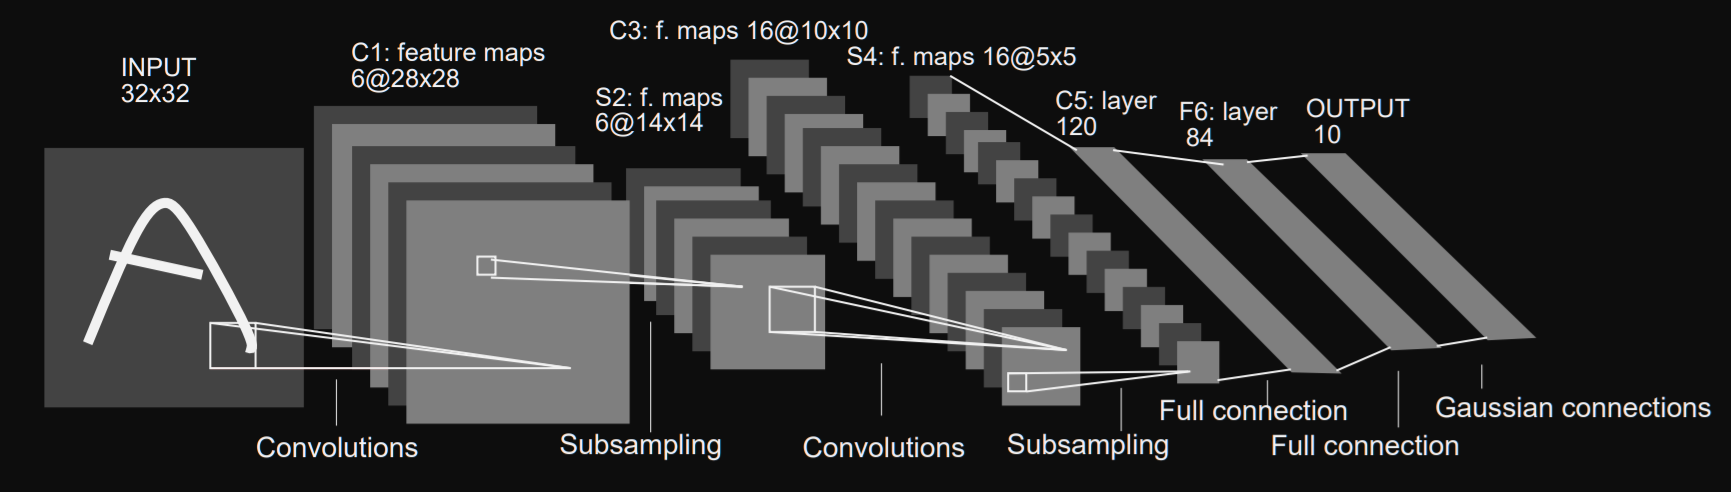

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, regularizers

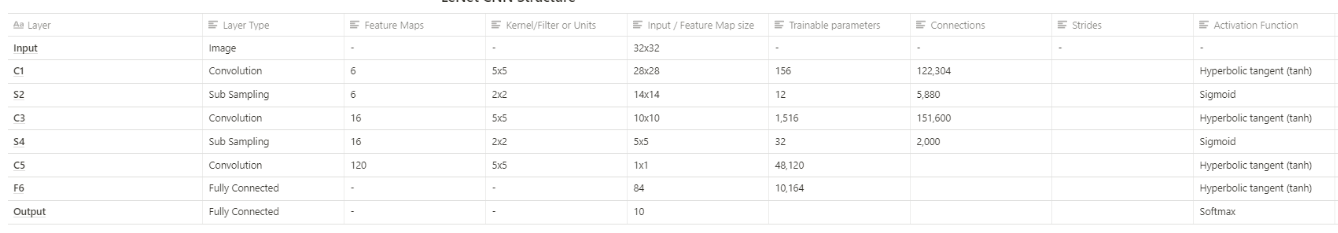

In [ ]:
# Functional API: 

def my_Model(): 
  inputs= keras.Input(shape=(32,32,1))
  x = layers.Conv2D(filters =6,kernel_size = (5,5),strides =(1,1))(inputs)
  x = tf.nn.relu(x)
  x = layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(x)
  x = layers.Conv2D(filters =16,kernel_size = (5,5),strides =(1,1))(x)
  x = tf.nn.relu(x)
  x = layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(x)
  x = layers.Conv2D(filters =120,kernel_size = (5,5),strides =(1,1))(x)
  x = tf.nn.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(84)(x)
  x = tf.nn.relu(x)
  outputs = layers.Dense(10, activation="softmax")(x)
  model= keras.Model(inputs=inputs,
                     outputs=outputs)
  return model

In [ ]:
model = my_Model()
model.compile(loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer =keras.optimizers.Adam(lr=3e-4),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
tf.nn.relu_1 (TFOpLambda)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0     

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("train_x_shape: ", train_x.shape)
print("val_x_shape: ", val_x.shape)
print("train_y_shape: ", train_y.shape)
#print("val_y_shape: ", val_y.shape)

train_x_shape:  (60000, 28, 28, 1)
val_x_shape:  (5000, 28, 28, 1)
train_y_shape:  (60000,)


In [ ]:
import numpy as np
train_x = np.pad(train_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
val_x = np.pad(val_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')


In [ ]:
model.compile(optimizer= "Adam", loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [ ]:
model.fit(train_x, train_y,batch_size=64 ,epochs= 10, verbose=2)

Epoch 1/10
938/938 - 29s - loss: 0.3029 - accuracy: 0.9084
Epoch 2/10
938/938 - 29s - loss: 0.0863 - accuracy: 0.9739
Epoch 3/10
938/938 - 29s - loss: 0.0602 - accuracy: 0.9813
Epoch 4/10
938/938 - 29s - loss: 0.0473 - accuracy: 0.9851
Epoch 5/10
938/938 - 29s - loss: 0.0377 - accuracy: 0.9882
Epoch 6/10
938/938 - 30s - loss: 0.0328 - accuracy: 0.9895
Epoch 7/10
938/938 - 30s - loss: 0.0284 - accuracy: 0.9908
Epoch 8/10
938/938 - 30s - loss: 0.0240 - accuracy: 0.9925
Epoch 9/10
938/938 - 30s - loss: 0.0215 - accuracy: 0.9933
Epoch 10/10
938/938 - 30s - loss: 0.0197 - accuracy: 0.9934


In [ ]:
model.evaluate(val_x, val_y, verbose=2)

157/157 - 1s - loss: 0.0124 - accuracy: 0.9956


[0.012405263260006905, 0.9955999851226807]

In [ ]:
#SubClass Model
import tensorflow as tf

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.relu = tf.nn.relu
    self.linear1 = layers.Dense(84, activation=tf.nn.relu)
    self.linear2 = layers.Dense(10, activation=tf.nn.softmax)
    self.pool = layers.AvgPool2D(pool_size=(2,2), strides=(2,2))
    self.conv1= layers.Conv2D(filters=6, kernel_size=(5,5),strides=(1,1))
    self.conv2= layers.Conv2D(filters=16, kernel_size=(5,5),strides=(1,1))
    self.conv3= layers.Conv2D(filters=120, kernel_size=(5,5),strides=(1,1))

  def call(self, inputs):
    x = self.relu(self.conv1(inputs))
    #print(x.shape)
    x = self.pool(x)
    #print(x.shape)
    x = self.relu(self.conv2(x))
    #print(x.shape)
    x = self.pool(x)
    #print(x.shape)
    x = self.relu(self.conv3(x))
    #print(x.shape)
    x = self.linear1(layers.Flatten()(x))
    #print(x.shape)
    x = self.linear2(x)
    #print(x.shape)
    return x


model = MyModel()

In [ ]:
model.compile(optimizer= "Adam", loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [ ]:
model.fit(train_x, train_y,batch_size=64 ,epochs= 10, verbose=2)

Epoch 1/10
938/938 - 30s - loss: 0.2777 - accuracy: 0.9151
Epoch 2/10
938/938 - 30s - loss: 0.0888 - accuracy: 0.9725
Epoch 3/10
938/938 - 30s - loss: 0.0635 - accuracy: 0.9805
Epoch 4/10
938/938 - 30s - loss: 0.0497 - accuracy: 0.9840
Epoch 5/10
938/938 - 30s - loss: 0.0417 - accuracy: 0.9870
Epoch 6/10
938/938 - 30s - loss: 0.0347 - accuracy: 0.9888
Epoch 7/10
938/938 - 30s - loss: 0.0306 - accuracy: 0.9901
Epoch 8/10
938/938 - 30s - loss: 0.0257 - accuracy: 0.9917
Epoch 9/10
938/938 - 30s - loss: 0.0233 - accuracy: 0.9923
Epoch 10/10
938/938 - 30s - loss: 0.0198 - accuracy: 0.9934


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  10164     
_________________________________________________________________
dense_3 (Dense)              multiple                  850       
_________________________________________________________________
average_pooling2d_2 (Average multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  156       
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  2416      
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  48120     
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
______________________________________________________

In [ ]:
#The "exact" LetNet architecture
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer= "Adam", loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [ ]:
lenet_5_model.fit(train_x, train_y,batch_size=64 ,epochs= 10, verbose=2)

Epoch 1/10
938/938 - 40s - loss: 0.2731 - accuracy: 0.9199
Epoch 2/10
938/938 - 40s - loss: 0.1046 - accuracy: 0.9684
Epoch 3/10
938/938 - 41s - loss: 0.0708 - accuracy: 0.9780
Epoch 4/10
938/938 - 40s - loss: 0.0524 - accuracy: 0.9838
Epoch 5/10
938/938 - 40s - loss: 0.0400 - accuracy: 0.9872
Epoch 6/10
938/938 - 40s - loss: 0.0321 - accuracy: 0.9902
Epoch 7/10
938/938 - 40s - loss: 0.0257 - accuracy: 0.9922
Epoch 8/10
938/938 - 40s - loss: 0.0221 - accuracy: 0.9931
Epoch 9/10
938/938 - 41s - loss: 0.0176 - accuracy: 0.9942
Epoch 10/10
938/938 - 41s - loss: 0.0150 - accuracy: 0.9950


In [ ]:
lenet_5_model.evaluate(val_x, val_y, verbose=2)

157/157 - 2s - loss: 0.0106 - accuracy: 0.9968


[0.010585419833660126, 0.9968000054359436]

In [ ]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                1